# 薛定谔方程
---

Time-dependent Schrödinger equation (nonrelativistic version) 
$$i \hbar \frac{d}{d t}|\Psi(t)\rangle=\hat{H}|\Psi(t)\rangle$$

Holding the Hamiltonian $\hat{H}$ constant, the Schrödinger equation has the solution,
$$|\Psi(t)\rangle=e^{-i \hat{H} t / \hbar}|\Psi(0)\rangle$$
The operater $\hat{U}=e^{-i \hat{H} t / \hbar}$ is known as the time-evolution operator.

Wave functions can form standing waves, called stationary states, described by Time-independent Schrödinger equation,
$$\hat{H}|\Psi\rangle=E\Psi$$
where Hamiltonian operator $\hat{H}=-\frac{\hbar^{2}}{2 m} \nabla^{2}+V(\mathbf{r})$ in the position representation.

## Real-Space Grid
---
The simplest way to represent a real function $f(x)$, with $a ≤ x ≤ b$, is to sample it on a real-space grid of points $\left\{x_i\right\}$ from a to b with some uniform spacing h. The function is then represented by the vector of values $\left\{f (x_i)\right\}$

Second order linear differention in discrete space,
$$\frac{d^{2} f}{d x^{2}}=\lim _{h \rightarrow 0} \frac{f(x-h)-2 f(x)+f(x+h)}{h^{2}}$$  
[Laplace operator](https://en.wikipedia.org/wiki/Discrete_Laplace_operator)/Laplacian matrix applied on discrete coordinates in [a, b]
$$
\frac{d^{2} f}{d x^{2}}=\begin{bmatrix}\begin{array}{ccccccc}-2 & 1 & 0 & \ldots & 0 & 0 \\ 1 & -2 & 1 & \ldots & 0 & 0 \\ 0 & 1 & -2 & \ldots & 0 & 0 \\ \ldots & \ldots & \ldots & \ldots & \ldots & \ldots \\ 0 & 0 & 0 & \ldots & -2 & 1 \\ 0 & 0 & 0 & \ldots & 1 & -2\end{array}\end{bmatrix}\begin{bmatrix}\begin{array}{c}f(a) \\ f(a+h) \\ f(a+2 h) \\ \ldots \\ f(a+(n-2) h) \\ f(b)\end{array}\end{bmatrix} / h^{2}=\operatorname{Lap}|f\rangle
$$  

## 一维单粒子薛定谔方程
---

We will establish a matrix representation of the Hamiltonian of one partical starting with the kinetic operator $-\frac{\hbar^{2}}{2 m}$ and and external potential $v_{ext}$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

class Schrodinger:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar=1,
                 xmin=-5, xmax=5, ninterval=201):
        self.x = np.linspace(xmin, xmax, ninterval)
        self.Potential = np.diag(potential_func(self.x), 0)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, N):
        return (-2 * np.diag(np.ones((N), np.float32), 0)
            + np.diag(np.ones((N-1), np.float32), 1)
            + np.diag(np.ones((N-1), np.float32), -1))/(dx**2)
    def eig_solve(self):
        eigValue, eigVector = np.linalg.eigh(self.Hamiltonian)
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
    def plot_wavefunction(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            ax.plot(self.x, self.eigVector[:, n], label=r'$E_{%s}=%.2f$'%(n, self.eigEnergy[n]))
        ax.set_ylabel(r'$\psi(x)$')
        ax.set_xlabel(r'$x$')
        ax.legend()
    def plot_density(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            density = np.abs(self.eigVector[:, n]) ** 2
            ax.plot(self.x, density, label=r'$E_{%s}=%.2f$'%(n, self.eigEnergy[n]))
        ax.set_ylabel(r'$\rho(x)=\psi^*(x)\psi(x)$')
        ax.set_xlabel(r'$x$')
        ax.legend()

### 无限深方势井
---

Lowest Energies [0.04885965 0.1954268  0.43966598 0.78151812 1.22090054]


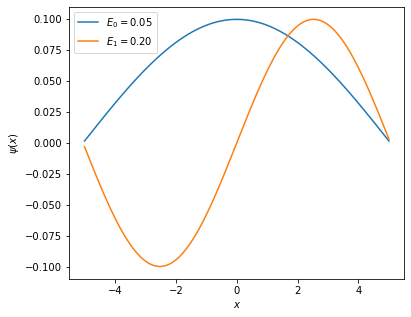

In [2]:
def infinite_square_potential(x):
    return np.zeros_like(x)

schro_infinite_square = Schrodinger(infinite_square_potential)
schro_infinite_square.eig_solve()
print("Lowest Energies", schro_infinite_square.eigEnergy[0:5])

schro_infinite_square.plot_wavefunction(0, 1)

数值计算结果和解析解相符。

$$\phi_{n}=\sqrt{\frac{2}{L}}\sin{\frac{n\pi x}{L}}$$
$$E_{n}=\frac{n^2h^2}{8mL^2}$$

粒子在简谐势阱中的分布概率密度

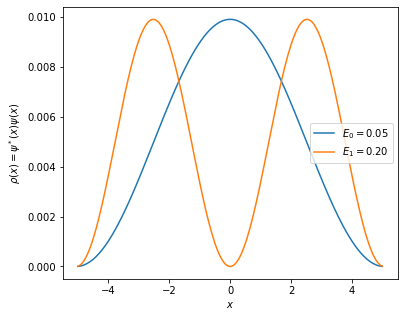

In [3]:
schro_infinite_square.plot_density(0, 1)

### 简谐势井
---

Lowest Energies [0.71048604 2.13114541 3.55117916 4.97058688 6.38936816]


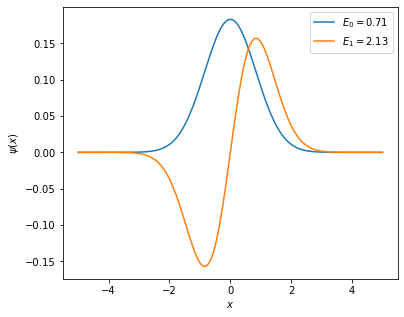

In [4]:
def harmonic_potential(x, k=2):
    return 0.5 * k * x**2

schro_harmonic = Schrodinger(harmonic_potential)
schro_harmonic.eig_solve()
print("Lowest Energies", schro_harmonic.eigEnergy[0:5])

schro_harmonic.plot_wavefunction(0, 1)

粒子在简谐势阱中的分布概率密度

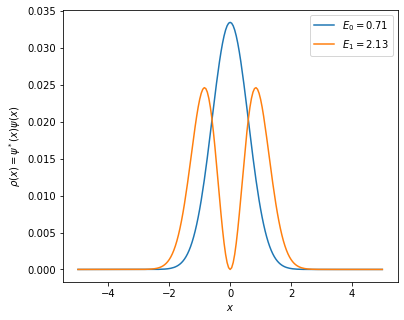

In [5]:
schro_harmonic.plot_density(0, 1)

### 有限深方势井
---

Lowest Energies [-48.92993246 -45.73298784 -40.45101567 -33.16247201 -24.0051611 ]


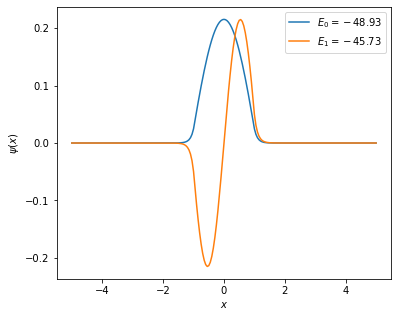

In [6]:
def square_well_potential(x, h=50):
    u = np.zeros_like(x)
    u[abs(x) < 1] = -h
    return u

schro_square_well = Schrodinger(square_well_potential)
schro_square_well.eig_solve()
print("Lowest Energies", schro_square_well.eigEnergy[0:5])

schro_square_well.plot_wavefunction(0, 1)

粒子在有限深方势阱中的分布概率密度

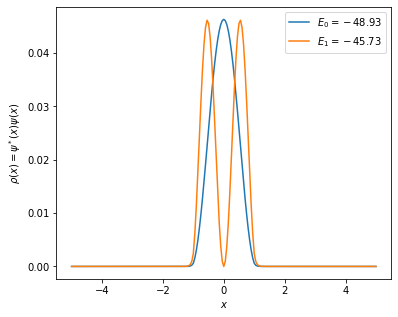

In [7]:
schro_square_well.plot_density(0, 1)

### 有限深双方势井
---


Lowest Energies [-12.18398547 -12.13090707   0.22845904   0.26652875   0.80552188]


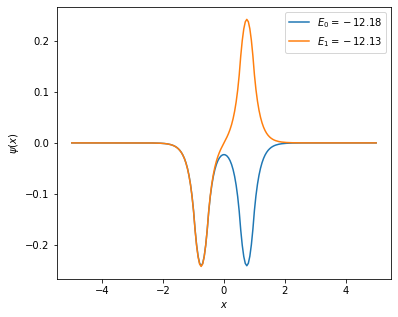

In [8]:
def double_well_potential(x, h=20):
    u = np.zeros_like(x)
    u[(abs(x) > 0.5) & (abs(x) < 1)] = -h
    return u

schro_double_well = Schrodinger(double_well_potential)
schro_double_well.eig_solve()
print("Lowest Energies", schro_double_well.eigEnergy[0:5])

schro_double_well.plot_wavefunction(0, 1)

粒子在有限深双势阱中的分布概率密度

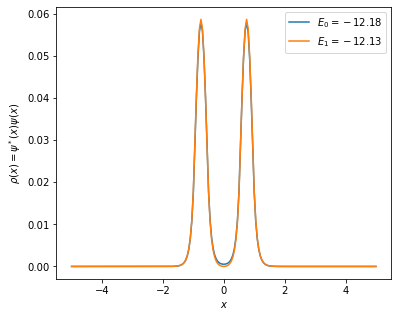

In [9]:
schro_double_well.plot_density(0, 1)

可以看到，有限深双势井的基态是简并的，且粒子分布概率密度相同。

### 量子叠加态和含时薛定谔方程
---

Consider initial state to be a linear combination of groud state and 1st excitation state,
$$|\Psi(t=0)\rangle=(|\Psi_{E_{0}}\rangle + |\Psi_{E_{1}}\rangle)/\sqrt{2}$$
which is not stationary and its density distribution is time-dependent.
$$|\psi(t)\rangle=\frac{1}{\sqrt{2}}\left(\left|\psi_{E_{0}}\right\rangle \exp \left(\frac{-i E_{0} t}{\hbar}\right)+\left|\psi_{E_{1}}\right\rangle \exp \left(\frac{-i E_{1} t}{\hbar}\right)\right)$$
$$\rho(x, t)=\langle\psi(t)|\psi(t)\rangle=\frac{1}{2}\left[\left|\psi_{E_{0}}(x)\right|^{2}+\left|\psi_{E_{1}}(x)\right|^{2}+2\left|\psi_{E_{0}}(x)\right|\left|\psi_{E_{1}}(x)\right| \cos \left(\frac{(E_{0}-E_{1}) t}{\hbar}\right)\right]$$

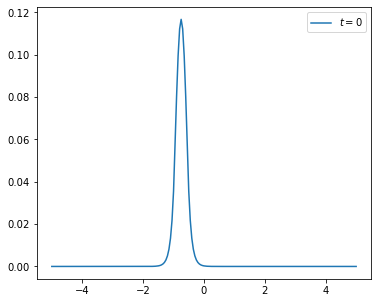

In [10]:
def psit(t, hbar = 1):
    psi0 = schro_double_well.eigVector[:, 0]
    psi1 = schro_double_well.eigVector[:, 1]
    E0 = schro_double_well.eigEnergy[0]
    E1 = schro_double_well.eigEnergy[1]
    return 1/np.sqrt(2) * (psi0 * np.exp(-1j * E0 * t/hbar)
                        +  psi1 * np.exp(-1j * E1 * t/hbar))

density = np.abs(psit(0)) ** 2

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(schro_double_well.x, density, label = r'$t = 0$')
ax.legend()

The partical is oscillating between the two wells with a period of $\frac{2\pi\hbar}{E_{0}-E_{1}}$

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
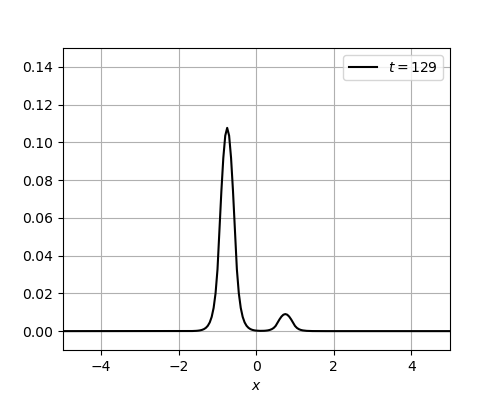

In [11]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class UpdateDist:
    def __init__(self, ax, x):
        self.success = 0
        self.line, = ax.plot([], [], 'k-')
        self.x = x
        self.ax = ax
        # Set up plot parameters
        self.ax.set_xlim(-5, 5)
        self.ax.set_ylim(-0.01, 0.15)
        self.ax.grid(True)
    def __call__(self, i):
        time = i * 1
        psi = psit(t = time)
        density = np.abs(psi) ** 2
        self.line.set_data(self.x, density)
        self.line.set_label(r'$t=%s$'%(time))
        self.ax.legend()
        return self.line,

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=100)
ax.set_xlabel(r'$x$')
ud = UpdateDist(ax, x=schro_double_well.x)
ani = FuncAnimation(fig, ud, frames=130, interval=100, blit=True)
ani.save('DoubleWell.gif', writer='imagemagick', fps=20)

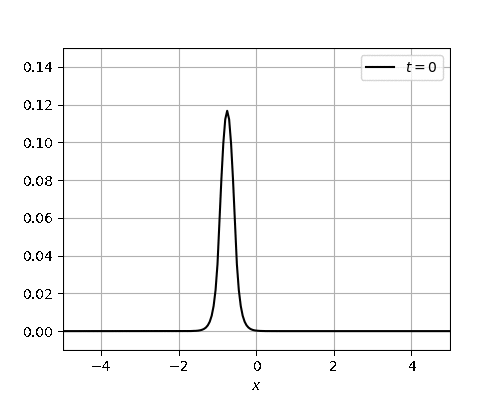

In [12]:
from IPython.display import Image
Image(filename ='DoubleWell.gif', width=500)

可以发现：

1. 对于一维非奇性势能运动，粒子运动不简并，第n个激发态有n个零点。
2. 对于双无限深势井，第n和n+1个激发态能量兼并。对应的物理图像是粒子无法穿越无限高势垒。

### 基矢变换
---
选择一组基函数（基矢），将原函数表示为基函数的线性组合。原问题转变为求解基函数的组合系数。

$$\phi_{n}=\sqrt{\frac{2}{L}}\sin{\frac{n\pi x}{L}}$$
$$\phi_{old} = A \phi_{new}$$
$$H_{new} = A^T H_{old} A$$

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

class Schrodinger_basis_set:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar=1,
                 xmin=-5, xmax=5, ninterval=101):
        self.xmin = xmin
        self.xmax = xmax
        self.ninterval = ninterval
        self.x = np.linspace(xmin, xmax, ninterval)
        self.Potential = np.diag(potential_func(self.x), 0)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, N):
        return (-2 * np.diag(np.ones((N), np.float32), 0)
            + np.diag(np.ones((N-1), np.float32), 1)
            + np.diag(np.ones((N-1), np.float32), -1))/(dx**2)        
    def basis_set(self, ninterval, N):
        phi = np.zeros(ninterval)
        for i in range(ninterval):
            phi[i] = np.sqrt(2/ninterval) * np.sin((N+1)*np.pi*i/ninterval)
        return phi
    def eig_solve(self, nmax):
        ''' X_old = A X_new '''
        self.transition_matrix = np.zeros([self.ninterval, nmax])
        for n in range(nmax):
            self.transition_matrix[:,n] = self.basis_set(self.ninterval, n)
        Hamiltonian_new = self.transition_matrix.T@self.Hamiltonian@self.transition_matrix
        eigValue, eigVector = np.linalg.eigh(Hamiltonian_new)  
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
    def plot_wavefunction(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            ax.plot(self.x, self.transition_matrix@self.eigVector[:, n], label=r'$E_{%s}=%.2f$'%(n, self.eigEnergy[n]))
        ax.set_ylabel(r'$\psi(x)$')
        ax.set_xlabel(r'$x$')
        ax.legend()
    def plot_density(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            density = np.abs(self.transition_matrix@self.eigVector[:, n]) ** 2
            ax.plot(self.x, density, label=r'$E_{%s}=%.2f$'%(n, self.eigEnergy[n]))
        ax.set_ylabel(r'$\rho(x)=\psi^*(x)\psi(x)$')
        ax.set_xlabel(r'$x$')
        ax.legend()

我们使用的基函数是无限深方势阱的本征态。对于无限深方势阱，求解基矢变换后的矩阵的本征值不会产生误差。

Energy [0.04934404 0.19732843 0.44380999 0.78855028 1.23121578]


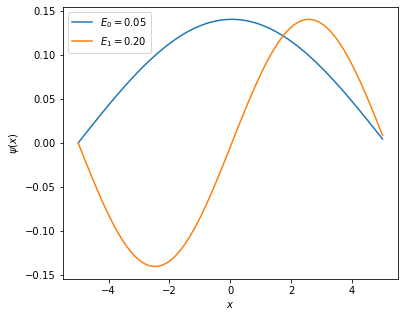

In [14]:
schro_bs_infinite_square = Schrodinger_basis_set(infinite_square_potential)
schro_bs_infinite_square.eig_solve(10)  # 基矢数目为10
print("Energy", schro_bs_infinite_square.eigEnergy[:5])

schro_bs_infinite_square.plot_wavefunction(0, 1)

对于其他类型的势井，例如简谐势井，如果基矢组规模较小，拟合效果就会比较差。计算得到的本征值也会产生较大误差。

Energy [ 1.7676504   5.48973683 11.64370132 17.02963866 29.25256856]


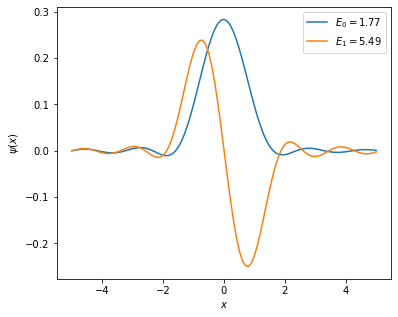

In [15]:
def harmonic_potential(x, k=10):
    return 0.5 * k * x**2

schro_bs_harmonic = Schrodinger_basis_set(harmonic_potential)
schro_bs_harmonic.eig_solve(10)  # 基矢数目为20
print("Energy", schro_bs_harmonic.eigEnergy[0:5])

schro_bs_harmonic.plot_wavefunction(0, 1)

通过增加基矢数量，可以消除上述误差。

Energy [ 1.59384065  4.77539452  7.94982418 11.11954475 14.41303302]


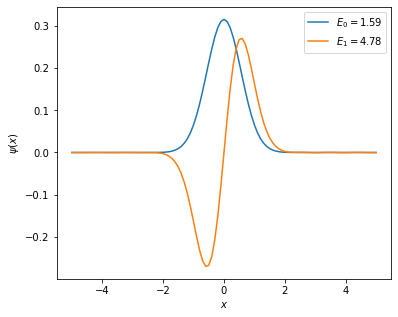

In [16]:
schro_bs_harmonic.eig_solve(20)  # 基矢数目为20
print("Energy", schro_bs_harmonic.eigEnergy[0:5])

schro_bs_harmonic.plot_wavefunction(0, 1)

## 一维双粒子薛定谔方程
---

考虑一个无相互作用双粒子的波函数 $\phi(x_1, x_2)$，将其离散化到$N^2$个坐标格点$\left\{x_{1i}, x_{2j}\right\}$，对应的Hamiltonian矩阵的尺寸为$N^2 \times N^2$。

In [17]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import time

class Schrodinger2D:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar=1,
                 xmin = -5, xmax = 5, ninterval=100):
        self.ninterval = ninterval
        self.x1 = np.linspace(xmin, xmax, ninterval)
        self.x2 = np.linspace(xmin, xmax, ninterval)
        potential = np.zeros(ninterval**2)
        for i in range(ninterval):
            for j in range(ninterval):
                potential[i*ninterval+j] = potential_func(self.x1[i], self.x2[j])
        self.Potential = np.diag(potential, 0)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, N):
        laplacian_x1 = (-2 * np.diag(np.ones((N**2), np.float32), 0)
            + np.diag(np.ones((N**2-1), np.float32), 1)
            + np.diag(np.ones((N**2-1), np.float32), -1))/(dx**2)
        for i in range(1, N):
            laplacian_x1[N*i-1, N*i] = 0
            laplacian_x1[N*i, N*i-1] = 0
        laplacian_x2 = (-2 * np.diag(np.ones((N**2), np.float32), 0)
            + np.diag(np.ones((N**2-N), np.float32), N)
            + np.diag(np.ones((N**2-N), np.float32), -N))/(dx**2)
        return laplacian_x1 + laplacian_x2
    def eig_solve(self):
        time_start = time.time()
        #eigValue, eigVector = eigh(self.Hamiltonian)
        Hamiltonian = sp.csr_matrix(self.Hamiltonian)
        eigValue, eigVector = sp.linalg.eigs(Hamiltonian, k=8, which='SM')
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
        time_end = time.time()
        print("Times Used %.2f S"%(time_end - time_start))
        return
    def plot_wavefunction(self, n):
        wave_func = np.reshape(self.eigVector[:, n], (self.ninterval, self.ninterval))
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        p = ax.imshow(wave_func.real, cmap='hot')
        cb = fig.colorbar(p, shrink=0.8)
        cb.set_label(r"$\phi(x_1, x_2).real$", fontsize=18)
        ax.set_xlabel(r'$x_1$')
        ax.set_ylabel(r'$x_2$')
        ax.set_title(r'$E_{%s}=%.4f$'%(n, self.eigEnergy[n].real), loc='left', fontsize=16)
    def plot_density(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            density = np.zeros(self.ninterval)
            for i in range(self.ninterval):
                for j in range(self.ninterval):
                    density[i] += np.abs(self.eigVector[:, n][i*self.ninterval+j]) ** 2
                    density[j] += np.abs(self.eigVector[:, n][i*self.ninterval+j]) ** 2
            ax.plot(density, label=r'$E_{%s}=%.4f$'%(n, self.eigEnergy[n].real))
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$\rho=\psi^*\psi$')
        ax.legend()

### 无限深方势井
---

In [18]:
def infinite_square_potential(x1, x2):
    return 0.0

schro_infinite_square = Schrodinger2D(infinite_square_potential)
schro_infinite_square.eig_solve()

print("Lowest Energies", np.real(schro_infinite_square.eigEnergy))

Times Used 3.14 S
Lowest Energies [0.09674354 0.24181206 0.24181206 0.38688057 0.48343697 0.48343697
 0.62850549 0.62850549]


我们可以将双粒子波函数的解写为：
$$\Phi=C_{1}\phi_{n}(x_{1})\phi_{m}(x_{2}) + C_{2}\phi_{m}(x_{1})\phi_{n}(x_{2})$$
其中$\phi$为单粒子波函数。

对应的能量为：
$$E=(n^2+m^2)\frac{\pi\hbar^2}{2ma^2}$$

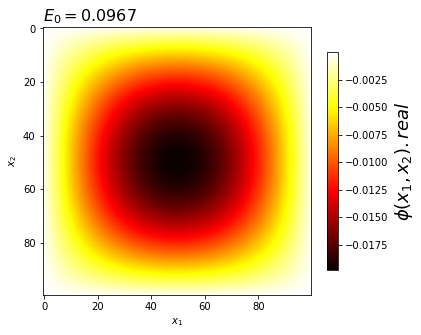

In [19]:
schro_infinite_square.plot_wavefunction(0)

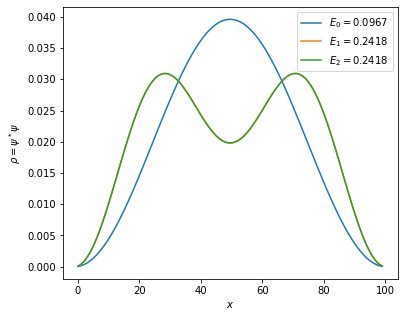

In [20]:
schro_infinite_square.plot_density(0, 1, 2)

根据量子力学的全同粒子假设，多粒子波函数的坐标交换之后，新状态应当与原状态是不可区分的。

$$\hat{P_{ij}} \Phi = C \Phi$$

其中$C=1$（交换对称）或者$C=-1$（交换反对称）。

我们下面将检查数值求解得到的波函数的对称性：

In [21]:
def check_symmetry(wave_func):
    wave_func_trans = np.transpose(wave_func)
    vector_exchange = wave_func_trans.flatten()
    wave_sum = (wave_func + wave_func_trans)
    wave_diff = (wave_func - wave_func_trans)
    if np.max(abs(wave_sum)) < 1e-02:
        print("Exchange Antisymmetry %.2f" %(np.max(abs(wave_sum))))
    elif np.max(abs(wave_diff)) < 1e-02:
        print("Exchange Symmetry %.2f" %(np.max(abs(wave_diff))))
    else:
        print("No Exchange Symmetry %.2f %.2f" %(np.max(abs(wave_sum)), np.max(abs(wave_diff))))
for n in range(8):
    wave_func = np.reshape(schro_infinite_square.eigVector[:, n], (schro_infinite_square.ninterval, schro_infinite_square.ninterval))
    print("Energy %.4f Orbital %.2d  " %(np.real(schro_infinite_square.eigEnergy[n]), n+1), end="")
    check_symmetry(wave_func)

Energy 0.0967 Orbital 01  Exchange Symmetry 0.00
Energy 0.2418 Orbital 02  No Exchange Symmetry 0.02 0.04
Energy 0.2418 Orbital 03  No Exchange Symmetry 0.04 0.02
Energy 0.3869 Orbital 04  Exchange Symmetry 0.00
Energy 0.4834 Orbital 05  No Exchange Symmetry 0.02 0.04
Energy 0.4834 Orbital 06  No Exchange Symmetry 0.05 0.02
Energy 0.6285 Orbital 07  No Exchange Symmetry 0.01 0.05
Energy 0.6285 Orbital 08  No Exchange Symmetry 0.05 0.01


对于波色子，
$$\Phi_{n,m}=\frac{1}{\sqrt{2}}(\phi_{n}(x_{1})\phi_{m}(x_{2})+\phi_{n}(x_{2})\phi_{m}(x_{1}))$$

对于费米子，
$$\Phi_{n,m}=\frac{1}{\sqrt{2}}(\phi_{n}(x_{1})\phi_{m}(x_{2})-\phi_{n}(x_{2})\phi_{m}(x_{1})), n \neq m$$

### 库伦相互作用

考虑两个带电粒子，例如电子（我们的方程中没有考虑自旋）。

In [22]:
def coulomb_potential(x1, x2, k=1):
    return k / (abs(x1-x2) + 1e-6)

schro_coulomb = Schrodinger2D(coulomb_potential)
schro_coulomb.eig_solve()

print("Energy", np.real(schro_coulomb.eigEnergy))

Times Used 4.80 S
Energy [0.5148627  0.51486279 0.82777822 0.82777848 0.95165408 0.95165455
 1.22499863 1.22499922]


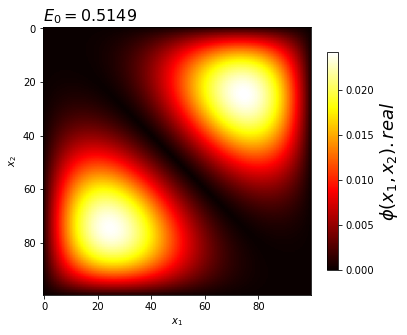

In [23]:
schro_coulomb.plot_wavefunction(0)

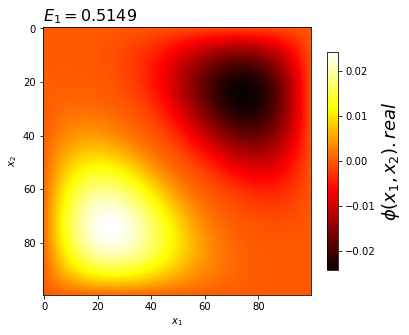

In [24]:
schro_coulomb.plot_wavefunction(1)

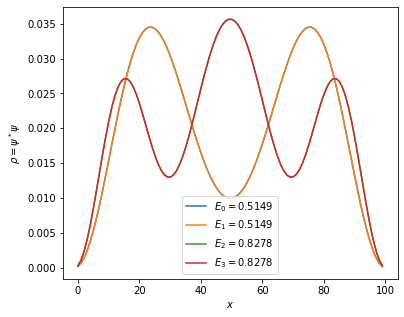

In [25]:
schro_coulomb.plot_density(0, 1, 2, 3)

我们再来检查轨道的对称性：

In [26]:
for n in range(8):
    wave_func = np.reshape(schro_coulomb.eigVector[:, n], (schro_coulomb.ninterval, schro_coulomb.ninterval))
    print("Energy %.4f Orbital %.2d  " %(np.real(schro_coulomb.eigEnergy[n]), n+1), end="")
    check_symmetry(wave_func)

Energy 0.5149 Orbital 01  Exchange Symmetry 0.00
Energy 0.5149 Orbital 02  Exchange Antisymmetry 0.00
Energy 0.8278 Orbital 03  Exchange Symmetry 0.00
Energy 0.8278 Orbital 04  Exchange Antisymmetry 0.00
Energy 0.9517 Orbital 05  Exchange Symmetry 0.00
Energy 0.9517 Orbital 06  Exchange Antisymmetry 0.00
Energy 1.2250 Orbital 07  Exchange Symmetry 0.00
Energy 1.2250 Orbital 08  Exchange Antisymmetry 0.00


可以发现，库伦排斥下，能量为二重简并，且简并的两个轨道分别为交换对称和交换反对称。

### 基矢变换

我们选择方势井波函数的本征态作为新基矢，对待求解波函数进行展开：

$$\phi_{n,m}=\frac{2}{a}\sin{\frac{n\pi x_{1}}{a}}\sin{\frac{m\pi x_{2}}{a}}$$

$$\phi_{old} = A \phi_{new}$$

相应的Hamiltonian矩阵转换为：
$$H_{new} = A^T H_{old} A$$

In [27]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import time

class Schrodinger2D_basis_set:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar=1,
                 xmin = -5, xmax = 5, ninterval=61):
        self.ninterval = ninterval
        self.x1 = np.linspace(xmin, xmax, ninterval)
        self.x2 = np.linspace(xmin, xmax, ninterval)
        potential = np.zeros(ninterval**2)
        for i in range(ninterval):
            for j in range(ninterval):
                potential[i*ninterval+j] = potential_func(self.x1[i], self.x2[j])
        self.Potential = np.diag(potential, 0)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, N):
        laplacian_x1 = (-2 * np.diag(np.ones((N**2), np.float32), 0)
            + np.diag(np.ones((N**2-1), np.float32), 1)
            + np.diag(np.ones((N**2-1), np.float32), -1))/(dx**2)
        for i in range(1, N):
            laplacian_x1[N*i-1, N*i] = 0
            laplacian_x1[N*i, N*i-1] = 0
        laplacian_x2 = (-2 * np.diag(np.ones((N**2), np.float32), 0)
            + np.diag(np.ones((N**2-N), np.float32), N)
            + np.diag(np.ones((N**2-N), np.float32), -N))/(dx**2)
        return laplacian_x1 + laplacian_x2
    def basis_set(self, ninterval, N, M):
        phi = np.zeros(ninterval*ninterval)
        for j in range(ninterval):
            for i in range(ninterval):
                phi[j*ninterval+i] = 2/ninterval * np.sin((N+1)*np.pi*i/ninterval) * np.sin((M+1)*np.pi*j/ninterval)
        return phi
    def eig_solve(self, nmax):
        ''' X_old = A X_new '''
        time_start = time.time()
        self.transition_matrix = np.zeros([self.ninterval**2, nmax**2])
        for m in range(nmax):
            for n in range(nmax):
                self.transition_matrix[:,m*nmax + n] = self.basis_set(self.ninterval, n, m)
        Hamiltonian_new = self.transition_matrix.T@self.Hamiltonian@self.transition_matrix
        eigValue, eigVector = np.linalg.eigh(Hamiltonian_new)
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
        time_end = time.time()
        print("Times Used %.2f S"%(time_end - time_start))
        return
    def plot_wavefunction(self, n):
        wave_func = np.reshape(self.transition_matrix@self.eigVector[:, n], (self.ninterval, self.ninterval))
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        p = ax.imshow(wave_func.real, cmap='hot')
        cb = fig.colorbar(p, shrink=0.8)
        cb.set_label(r"$\phi(x_1, x_2).real$", fontsize=18)
        ax.set_xlabel(r'$x_1$')
        ax.set_ylabel(r'$x_2$')
        ax.set_title(r'$E_{%s}=%.4f$'%(n, self.eigEnergy[n].real), loc='left', fontsize=16)
    def plot_density(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            density = np.zeros(self.ninterval)
            for i in range(self.ninterval):
                for j in range(self.ninterval):
                    vector = self.transition_matrix@self.eigVector[:, n]
                    density[i] += vector[i*self.ninterval+j] ** 2
                    density[j] += vector[i*self.ninterval+j] ** 2
            ax.plot(density, label=r'$E_{%s}=%.4f$'%(n, self.eigEnergy[n].real))
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$\rho=\psi^*\psi$')
        ax.legend()

In [28]:
schro_bs_coulomb = Schrodinger2D_basis_set(coulomb_potential)
schro_bs_coulomb.eig_solve(10)  # 基矢数目为10

print("Energy", np.real(schro_bs_coulomb.eigEnergy[:8]))

Times Used 0.81 S
Energy [0.52104168 0.52229861 0.8387412  0.84254557 0.96519081 0.97156133
 1.24189727 1.25088817]


将待求解波函数使用基矢组展开能够大幅降低计算量，和加快计算速度。所得结果的精度也是可以接受的。

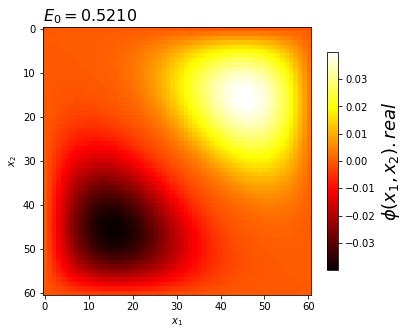

In [29]:
schro_bs_coulomb.plot_wavefunction(0)

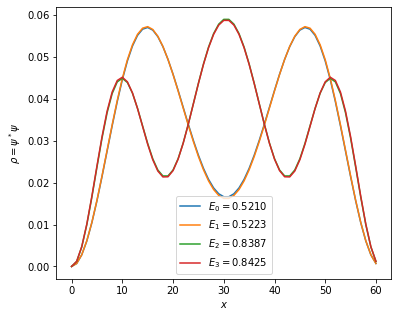

In [30]:
schro_bs_coulomb.plot_density(0, 1, 2, 3)

### 简谐势井
---

In [31]:
def harmonic_coulomb(x1, x2, k_h=2, k_c=1):
    return 0.5 * k_h * (x1**2 + x2**2) + k_c / (abs(x1-x2) + 1e-6)

schro_bs_harmonic_coulomb = Schrodinger2D_basis_set(harmonic_coulomb)
schro_bs_harmonic_coulomb.eig_solve(10)  # 基矢数目为10

print("Energy", np.real(schro_bs_harmonic_coulomb.eigEnergy[:8]))

Times Used 0.80 S
Energy [3.75215229 4.04175352 5.2370822  5.64528899 6.56860408 6.73196393
 7.14540847 7.91911233]


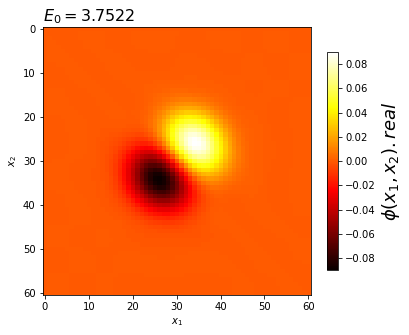

In [32]:
schro_bs_harmonic_coulomb.plot_wavefunction(0)

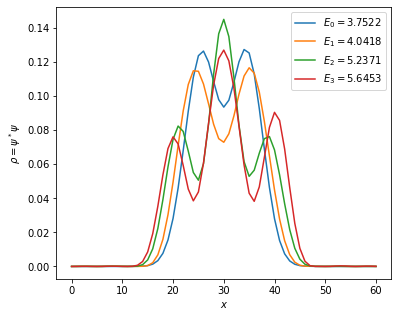

In [33]:
schro_bs_harmonic_coulomb.plot_density(0, 1, 2, 3)